### Cubic Spline Interpolation

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def f(x):
  '''The function to be interpolated

  :param x: independent variable
  :type x: double or np.array of doubles
  :return: the value of f evaluated at x
  :rtype: double or np.array
  '''
  # return np.exp(x)
  return np.sin(5*x)

We start with natural cubic splines

In [63]:
def natural_spline(x,node_x,node_y):
  '''Natural spline interpolation 

  :param x: locations where to generate the spline approximant
  :type x: numpy array of doubles
  :param node_x: nodal x coordinates to be interpolated
  :type node_x: numpy array of doubles
  :param node_y: nodel y values to be interpolated
  :type node_y: numpy array of doubles
  :return: natural spline interpolant at the x locations
  :rtype: numpy array of doubles
  '''
  # Set value of n
  n = len(node_x)-1
  # Define increments
  a = node_y
  b = np.zeros(n)
  d = np.zeros(n)
  h = node_x[1:] - node_x[:-1]
  # Assemble right-hand-side
  rhs = np.zeros(n+1)
  for i in range(1,n):
    rhs[i] = (3.0/h[i])*(a[i+1]-a[i]) - (3.0/h[i-1])*(a[i]-a[i-1])
  # Assemble the left-hand-side matrix
  lhs = np.zeros((n+1,n+1))
  for i in range(1,n):
    lhs[i,i-1] = h[i-1]
    lhs[i,i]   = 2.0*(h[i-1]+h[i])
    lhs[i,i+1] = h[i]
  # Add the diagonals for the first and last row
  lhs[0,0] = 1.0
  lhs[n,n] = 1.0
  # Solve for the c coefficients
  c = np.linalg.solve(lhs,rhs)
  # Determine the b,d coefficients
  for i in range(n):
    b[i] = (a[i+1]-a[i])/h[i] - h[i]*(c[i+1]+2.0*c[i])/3.0
    d[i] = (c[i+1]-c[i])/(3.0*h[i])
  # Determine the cubic spline every location in x belongs to
  spline_id = np.zeros(len(x),dtype=int)
  for i in range(n):
    for j in range(len(x)):
        if(x[j]>=node_x[i])and(x[j]<=node_x[i+1]):
          spline_id[j] = i
  # Return the spline evaluated at the x locations
  res = np.zeros(len(x))
  for i in range(len(x)):
      j = spline_id[i]
      res[i] = a[j] + b[j]*(x[i]-node_x[j]) + c[j]*(x[i]-node_x[j])**2 + d[j]*(x[i]-node_x[j])**3
  return res

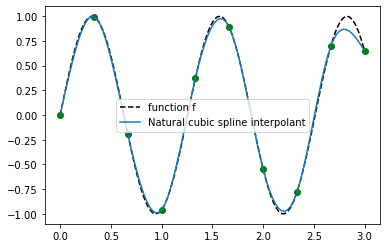

In [64]:
# Set locations for interpolation
node_x = np.linspace(0,3,10)
node_y = f(node_x)
# Provided the x locations where to evaluate the interpolating polynomial
x = np.linspace(0,3,100)
# Construct the interpolant and plot it
plt.plot(node_x,node_y,'go')
plt.plot(x,f(x),'k--',label='function f')
plt.plot(x,natural_spline(x,node_x,node_y),label='Natural cubic spline interpolant')
plt.legend()
plt.show()

We now consider a clamped spline 

In [65]:
def clamped_spline(x,node_x,node_y,fprime_x0,fprime_xn):
  '''Interpolation with clamped cubic spline

  :param x: locations where to generate the spline approximant
  :type x: numpy array of doubles
  :param node_x: nodal x coordinates to be interpolated
  :type node_x: numpy array of doubles
  :param node_y: nodel y values to be interpolated
  :type node_y: numpy array of doubles
  :param fprime_x0: derivative of f at x0
  :type fprime_x0: double
  :param fprime_xn: derivative of f at xn
  :type fprime_xn: double
  :return: natural spline interpolant at the x locations
  :rtype: numpy array of doubles
  '''
  # Set value of n
  n = len(node_x)-1
  # Define increments
  a = node_y
  b = np.zeros(n)
  d = np.zeros(n)
  h = node_x[1:] - node_x[:-1]
  # Assemble right-hand-side
  rhs = np.zeros(n+1)
  for i in range(1,n):
    rhs[i] = (3.0/h[i])*(a[i+1]-a[i]) - (3.0/h[i-1])*(a[i]-a[i-1])
  # Add the first and last component for a clamped spline
  rhs[0] = 3.0*(a[1]-a[0])/h[0] - 3.0*fprime_x0
  rhs[-1] = 3.0*fprime_xn - 3.0*(a[n]-a[n-1])/h[n-1]
  # Assemble the left-hand-side matrix
  lhs = np.zeros((n+1,n+1))
  for i in range(1,n):
    lhs[i,i-1] = h[i-1]
    lhs[i,i]   = 2.0*(h[i-1]+h[i])
    lhs[i,i+1] = h[i]
  # Add the appropriate first and last row for the clamped spline
  lhs[0,0] = 2.0*h[0]
  lhs[0,1] = h[0]
  lhs[n,n-1] = h[-1]
  lhs[n,n] = 2.0*h[-1]
  # Solve for the c coefficients
  c = np.linalg.solve(lhs,rhs)
  # Determine the b,d coefficients
  for i in range(n):
    b[i] = (a[i+1]-a[i])/h[i] - h[i]*(c[i+1]+2.0*c[i])/3.0
    d[i] = (c[i+1]-c[i])/(3.0*h[i])
  # Determine the cubic spline every location in x belongs to
  spline_id = np.zeros(len(x),dtype=int)
  for i in range(n):
    for j in range(len(x)):
        if(x[j]>=node_x[i])and(x[j]<=node_x[i+1]):
          spline_id[j] = i
  # Return the spline evaluated at the x locations
  res = np.zeros(len(x))
  for i in range(len(x)):
      j = spline_id[i]
      res[i] = a[j] + b[j]*(x[i]-node_x[j]) + c[j]*(x[i]-node_x[j])**2 + d[j]*(x[i]-node_x[j])**3
  return res

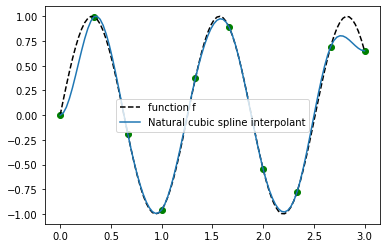

In [66]:
# Set locations for interpolation
node_x = np.linspace(0,3,10)
node_y = f(node_x)
# Provided the x locations where to evaluate the interpolating polynomial
x = np.linspace(0,3,100)
# Construct the interpolant and plot it
plt.plot(node_x,node_y,'go')
plt.plot(x,f(x),'k--',label='function f')
plt.plot(x,clamped_spline(x,node_x,node_y,0.0,0.0),label='Natural cubic spline interpolant')
plt.legend()
plt.show()